# KNN 으로 대출 예측

In [44]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [45]:
import pandas as pd

ploan = pd.read_csv('https://raw.githubusercontent.com/aettikang/bigdata_analysis_basic/60eff9c44d1cc02889faa6a0aeb68b2b29e443eb/Personal%20Loan.csv')

ploan.head(20) # 데이터 예시 확인


,Unnamed: 0,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,4,35,8,45,4,1.0,2,0,0,0,0,0,1
5,5,37,13,29,4,0.4,2,155,0,0,0,1,0
6,6,53,27,72,2,1.5,2,0,0,0,0,1,0
7,7,50,24,22,1,0.3,3,0,0,0,0,0,1
8,8,35,10,81,3,0.6,2,104,0,0,0,1,0
9,9,34,9,180,1,8.9,3,0,1,0,0,0,0


In [37]:
ploan.shape # 데이터 차원 확인

(2500, 13)

In [38]:
feature_columns = list(ploan.columns.difference(["Personal Loan"]))

X = ploan[feature_columns]
y = ploan['Personal Loan'] # 대출여부: 1 or 0

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1234)

In [40]:
import sklearn.preprocessing as preprocessing
preprocessor = preprocessing.Normalizer()

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

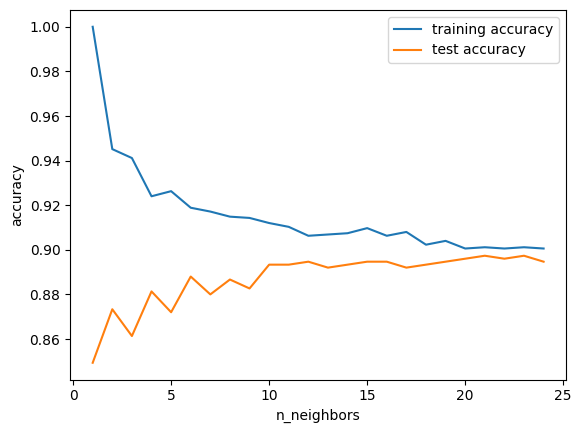

In [41]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

# K의 변화량에 따른 예측정확도 성능 비교
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [42]:
from itertools import compress

# numpy로 변환
test_accuracy = np.array(test_accuracy)

# 가장 높은 정확도를 가지는 위치를 불리언 배열로 생성
best_idx = test_accuracy == np.max(test_accuracy)

# 이 인덱스를 사용해 가장 좋은 이웃 수(best_n)를 추출
best_n = list(compress(neighbors_settings, best_idx))

print("Best neighbors:", best_n[0])

Best neighbors: 21


In [43]:
# 필요한 평가 지표 함수 불러오기
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 최적의 이웃 수(best_n 리스트에서 첫 번째 값)를 best_k에 저장
best_k = best_n[0]

# 최적의 k를 사용하여 k-NN 분류기 생성
best_clf = KNeighborsClassifier(n_neighbors=best_k)

# 최적 모델을 학습 데이터에 대해 학습
best_clf.fit(X_train, y_train)

# 학습 데이터에 대한 예측값 생성
train_pred_y = best_clf.predict(X_train)

# 테스트 데이터에 대한 예측값 생성
test_pred_y = best_clf.predict(X_test)

# 테스트 데이터에 대한 정확도(accuracy) 계산
tmp_acc = accuracy_score(y_test, test_pred_y)

# 최적 k 값과 해당 k에서의 테스트 정확도 출력
print("Best K is {}".format(best_k), ", Test acuurcy: {0:.4f}".format(tmp_acc))

# 혼동행렬 계산 (실제값 vs 예측값)
best_knn_conf = confusion_matrix(y_test, test_pred_y)


Best K is 21 , Test acuurcy: 0.8973


In [33]:
print(f'학습 혼동행렬 \n{confusion_matrix(y_train, train_pred_y)}')
print(f'테스트 혼동행렬 \n{confusion_matrix(y_test, test_pred_y)}\n')
print(f'학습 정확도 : {accuracy_score(y_train, train_pred_y):.4f}')
print(f'테스트 정확도 : {accuracy_score(y_test, test_pred_y):.4f}')

학습 혼동행렬 
[[1564    7]
 [ 166   13]]
테스트 혼동행렬 
[[670   3]
 [ 74   3]]

학습 정확도 : 0.9011
테스트 정확도 : 0.8973


## 수치형 변수만 정규화를 따로 수행할 경우 (성능이 더 높아짐)

 테스트 정확도가 가장 높은 k = 1, 정확도 = 0.9600


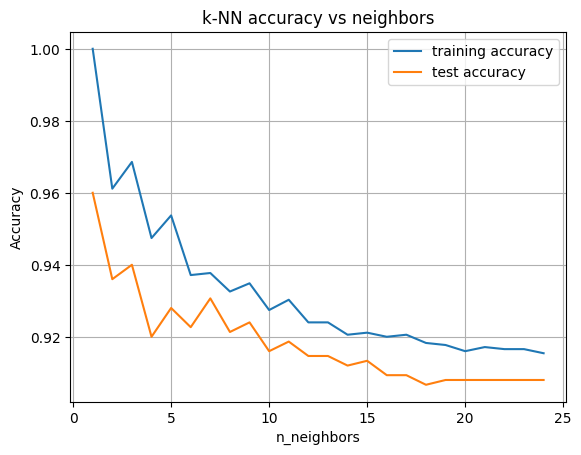

In [35]:
# 1. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

# 2. 데이터 불러오기
url = 'https://raw.githubusercontent.com/aettikang/bigdata_analysis_basic/60eff9c44d1cc02889faa6a0aeb68b2b29e443eb/Personal%20Loan.csv'
ploan = pd.read_csv(url)

# 3. 입력(X)과 타겟(y) 분리
X = ploan.drop(columns=["Personal Loan"])
y = ploan["Personal Loan"]

# 4. 수치형 / 이진형 피처 분리
numeric_features = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
binary_features = ['Education', 'Family', 'Securities Account', 'CD Account', 'Online']

# 5. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=1234
)

# 6. ColumnTransformer 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('bin', 'passthrough', binary_features)
    ]
)

# 7. Pipeline 정의
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

# 8. 정확도 측정
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 25)

for n_neighbors in neighbors_settings:
    pipe.set_params(knn__n_neighbors=n_neighbors)
    pipe.fit(X_train, y_train)

    training_accuracy.append(pipe.score(X_train, y_train))
    test_accuracy.append(pipe.score(X_test, y_test))

# 9. 최적 k 계산 및 출력
best_k = neighbors_settings[np.argmax(test_accuracy)]
best_acc = max(test_accuracy)
print(f" 테스트 정확도가 가장 높은 k = {best_k}, 정확도 = {best_acc:.4f}")

# 10. 시각화
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.title("k-NN accuracy vs neighbors")
plt.legend()
plt.grid(True)
plt.show()
